<a href="https://colab.research.google.com/github/Kouichi1229/Python_work/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/AI_專題/bug.zip" /content/

In [ ]:
!unzip /content/bug.zip -d  /content/

Archive:  /content/bug.zip
   creating: /content/bug/
   creating: /content/bug/Helicoverpa armigera/
  inflating: /content/bug/Helicoverpa armigera/001.jpg  
  inflating: /content/bug/Helicoverpa armigera/002.jpg  
  inflating: /content/bug/Helicoverpa armigera/003.jpg  
  inflating: /content/bug/Helicoverpa armigera/004.jpg  
  inflating: /content/bug/Helicoverpa armigera/005.jpg  
  inflating: /content/bug/Helicoverpa armigera/006.jpg  
  inflating: /content/bug/Helicoverpa armigera/007.jpg  
  inflating: /content/bug/Helicoverpa armigera/008.jpg  
  inflating: /content/bug/Helicoverpa armigera/009.jpg  
  inflating: /content/bug/Helicoverpa armigera/010.jpg  
  inflating: /content/bug/Helicoverpa armigera/011.jpg  
  inflating: /content/bug/Helicoverpa armigera/012.jpg  
  inflating: /content/bug/Helicoverpa armigera/013.jpg  
  inflating: /content/bug/Helicoverpa armigera/014.jpg  
  inflating: /content/bug/Helicoverpa armigera/015.jpg  
  inflating: /content/bug/Helicoverpa armig

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
pre_trained_model = VGG19(input_shape=(224, 224, 3),
                               include_top=False,
                               weights='imagenet')


# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (4, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '/content/bug'

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/content/bug',
                                                    batch_size = 4,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     


Found 589 images belonging to 4 classes.


In [ ]:
history = model.fit(
            train_generator,
            #validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 50,
            #validation_steps = 50,
            #verbose = 2
            )

Epoch 1/50
100/100 [==============================] - 14s 136ms/step - loss: 0.9199 - accuracy: 0.6373
Epoch 2/50
100/100 [==============================] - 13s 133ms/step - loss: 1.0153 - accuracy: 0.5768
Epoch 3/50
100/100 [==============================] - 13s 130ms/step - loss: 0.9434 - accuracy: 0.6247
Epoch 4/50
100/100 [==============================] - 14s 140ms/step - loss: 0.9981 - accuracy: 0.5919
Epoch 5/50
100/100 [==============================] - 13s 135ms/step - loss: 0.8981 - accuracy: 0.6375
Epoch 6/50
100/100 [==============================] - 13s 134ms/step - loss: 0.8400 - accuracy: 0.6448
Epoch 7/50
100/100 [==============================] - 14s 136ms/step - loss: 0.9043 - accuracy: 0.6550
Epoch 8/50
100/100 [==============================] - 14s 139ms/step - loss: 0.8792 - accuracy: 0.6650
Epoch 9/50
100/100 [==============================] - 13s 134ms/step - loss: 0.8415 - accuracy: 0.6675
Epoch 10/50
100/100 [==============================] - 14s 138ms/step - l

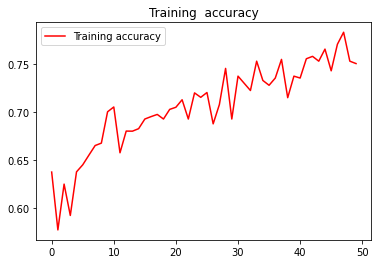

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training  accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save('./VGG19_BUG.h5')